uint8
(8192, 5497, 3)


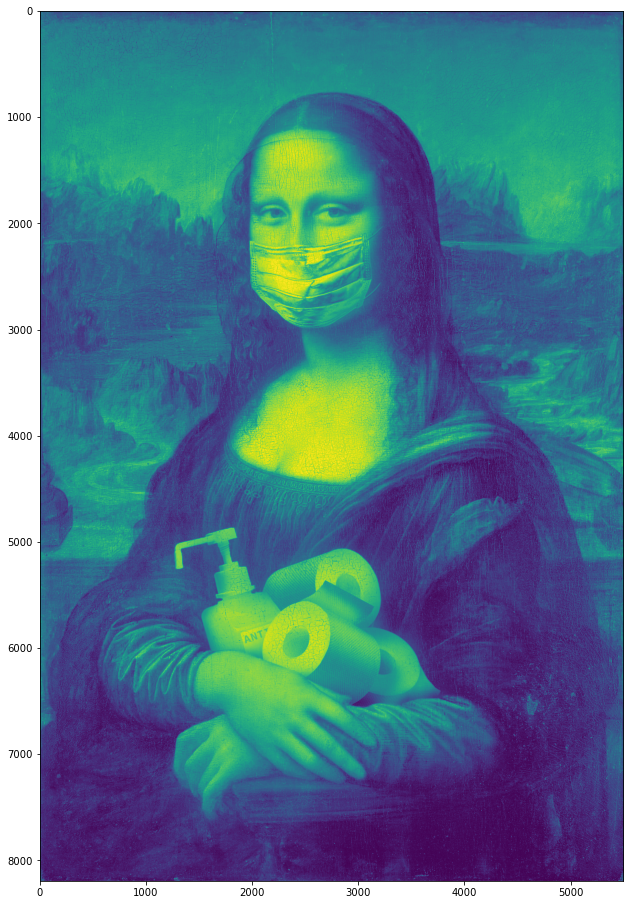

In [1]:
# load and display an image with Matplotlib
from matplotlib import image as img
from matplotlib import pyplot
import matplotlib.pyplot as plt

# load image as pixel array
image = img.imread('mona_lisa.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
plt.figure(figsize = (16,16))

pyplot.imshow(image[:,:,0])
pyplot.show()


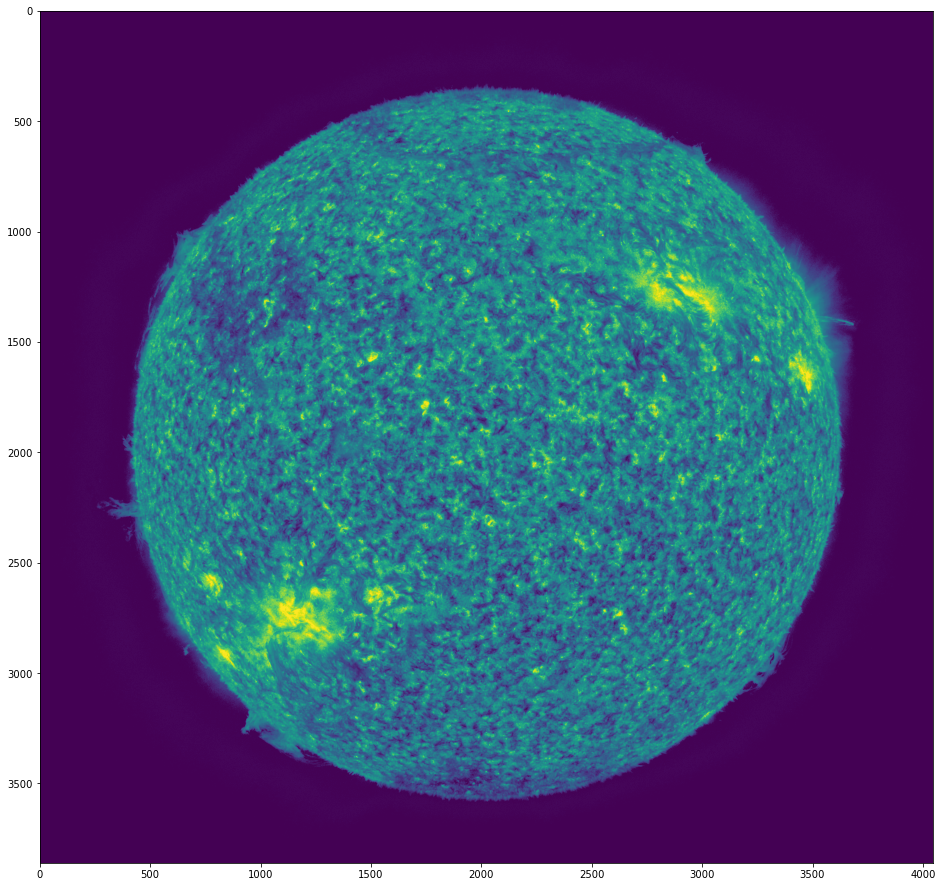

In [2]:
image = img.imread('sun.jpg')
plt.figure(figsize = (16,16))

pyplot.imshow(image[:,:,1])
pyplot.show()

In [4]:
data = image[:,:,1]


In [ ]:
data_T =  data.dot(data.T)

In [3]:
import numpy as np

In [31]:
data_value,data_vector = np.linalg.eig(data_T)

In [25]:
# for index,(value,vector) in enumerate(zip(data_value,data_vector)):
#     if value<0:
#         data_value[index] = -value
#     data_vector[index] = -vector
    

In [6]:
X = data
n_samples, n_features = X.shape
mean=np.array([np.mean(X[:,i]) for i in range(n_features)])
#normalization
norm_X=X-mean
#scatter matrix
scatter_matrix=np.dot(np.transpose(norm_X),norm_X) 
#Calculate the eigenvectors and eigenvalues
eig_val, eig_vec = np.linalg.eig(scatter_matrix)


In [7]:
eig_pairs = {np.abs(eig_val[i]):eig_vec[:,i] for i in range(n_features)}
# sort eig_vec based on eig_val from highest to lowest


In [8]:
eig_pairs = sorted(eig_pairs.items(), key=lambda x: x[0],reverse=True)

In [41]:
# using n:
n = 1000
value = []
vector = []
for i in eig_pairs[0:50]:
    value.append(i[0])
    vector.append(i[1]/np.sqrt(np.sum(i[1]**2)))

In [42]:
vector = np.array(vector)
value_vec = np.diag(np.sqrt(np.array(value)))

In [43]:
data.shape

(3860, 4044)

In [44]:
vector.shape

(50, 4044)

In [45]:
U = []
for i in range(value_vec.shape[0]):
    value = value_vec[i,i]
    vector_ = vector[i]
    U.append(data @ vector_ * (1/value))

In [46]:
U = np.array(U)


In [47]:
A = U.T @ value_vec @ vector

<ipython-input-48-0ac5876d8a72>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pyplot.imshow(A.astype(np.float))
<ipython-input-48-0ac5876d8a72>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pyplot.imshow(A.astype(np.float))


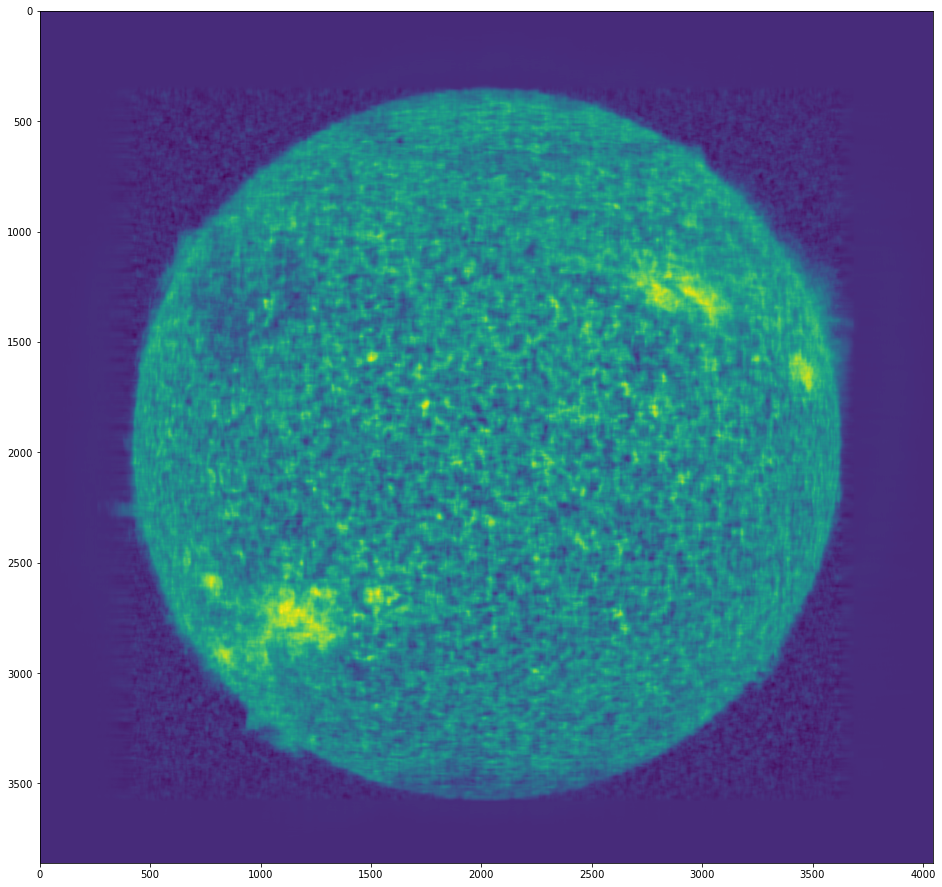

In [48]:
plt.figure(figsize = (16,16))

pyplot.imshow(A.astype(np.float))
pyplot.show()

In [49]:
def compress(X, n):
    '''
    X:数据 为矩阵的形式
    n:取前n行
    '''
    n_samples, n_features = X.shape
    mean=np.array([np.mean(X[:,i]) for i in range(n_features)])
    #normalization
    norm_X=X-mean
    #scatter matrix
    scatter_matrix=np.dot(np.transpose(norm_X),norm_X) 
    #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = {np.abs(eig_val[i]):eig_vec[:,i] for i in range(n_features)}
    eig_pairs = sorted(eig_pairs.items(), key=lambda x: x[0],reverse=True)
    # using n:
#     n = 3000
    value = []
    vector = []
    for i in eig_pairs[2:n]:
        value.append(i[0])
        vector.append(i[1]/np.sqrt(np.sum(i[1]**2)))
    vector = np.array(vector)
    value_vec = np.diag(np.sqrt(np.array(value)))
    U = []
    for i in range(value_vec.shape[0]):
        value = value_vec[i,i]
        vector_ = vector[i]
        U.append(data @ vector_ * (1/value))
    U = np.array(U)
    A = U.T @ value_vec @ vector
    return A

In [115]:
value = np.diag(value_vec)

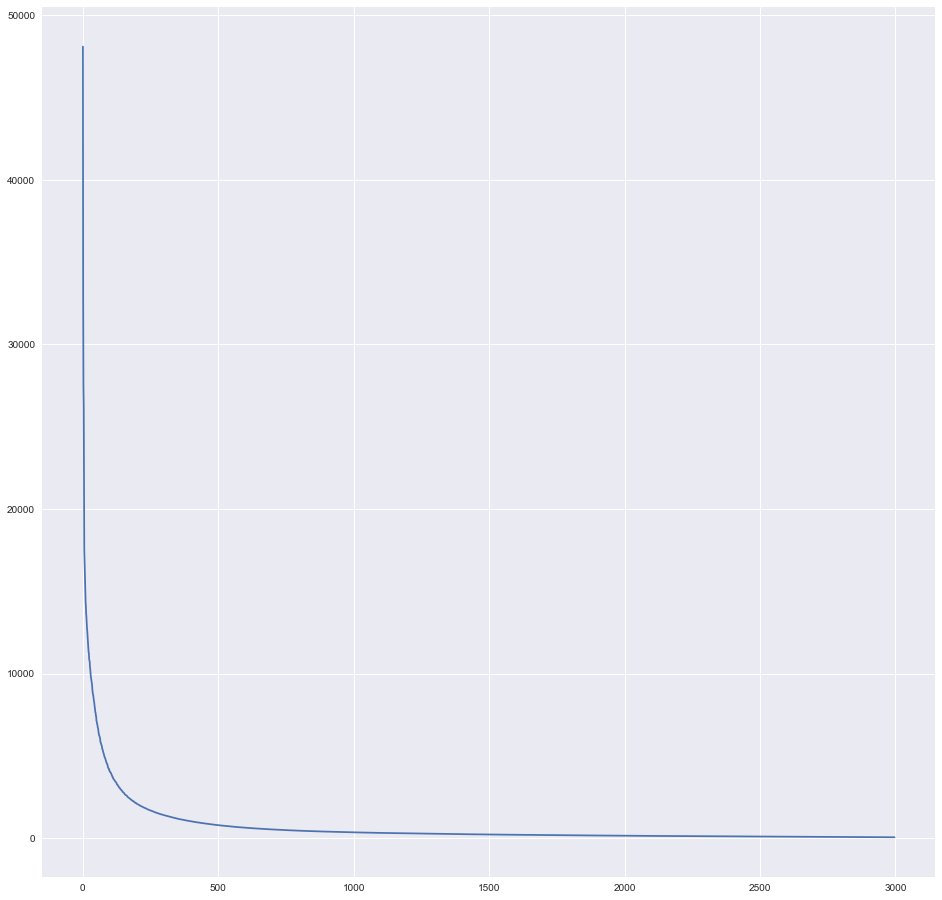

In [117]:
plt.style.use('seaborn')
plt.figure(figsize = (16,16))
plt.plot(value)